In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from os.path import join

plt.style.use(["seaborn", "thesis"])

/home/jcartus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Prepare Dataset 

In [39]:
#data_path = "../thesis/dataset/TSmall"
#postfix = "TSmall"
#dim = 70
data_path = "../butadien/data/"
postfix = ""
dim = 26

S = np.load(join(data_path, "S" + postfix + ".npy"))
P = np.load(join(data_path, "P" + postfix + ".npy"))
F = np.load(join(data_path, "F" + postfix + ".npy"))

index = np.load(join(data_path, "index" + postfix + ".npy"))

molecules = np.load(join(data_path, "molecules" + postfix + ".npy"))

from SCFInitialGuess.utilities.dataset import extract_triu_batch, AbstractDataset

s_triu = extract_triu_batch(S, dim)
p_triu = extract_triu_batch(P, dim)

s_triu_norm, mu, std = AbstractDataset.normalize(s_triu)

data= (s_triu_norm, p_triu)

# Selu

In [40]:
keras.backend.clear_session()

dim_triu = dim * (dim + 1) // 2
activation = "selu"
learning_rate = 1e-5
intializer = keras.initializers.RandomNormal(mean=0.0, stddev=1/dim_triu, seed=None)

model = keras.Sequential()

# input layer
model.add(keras.layers.Dense(dim_triu, activation=activation, input_dim=dim_triu, kernel_initializer=intializer, bias_initializer='zeros'))

# hidden
for i in range(6):
    model.add(keras.layers.Dense(
        dim_triu, 
        activation=activation, 
        kernel_initializer=intializer, 
        bias_initializer='zeros',
        kernel_regularizer=keras.regularizers.l2(0.01)
    ))



#output
model.add(keras.layers.Dense(dim_triu))

model.compile(optimizer=keras.optimizers.Adam(learning_rate, decay=1e-6), loss='MSE', metrics=['mae', 'mse'])

In [47]:
epochs = 10000

#early_stopping = keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error", min_delta=1e-10, patience=5)
history = model.fit(data[0], data[1], epochs=epochs, validation_split=0.2, verbose=1)#, callbacks=[early_stopping])

Train on 160 samples, validate on 40 samples
Epoch 1/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0187 - mean_absolute_error: 0.0146 - mean_squared_error: 8.8865e-04 - val_loss: 0.0189 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 0.0012

Epoch 2/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0186 - mean_absolute_error: 0.0146 - mean_squared_error: 8.8190e-04 - val_loss: 0.0189 - val_mean_absolute_error: 0.0159 - val_mean_squared_error: 0.0011

Epoch 3/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0186 - mean_absolute_error: 0.0146 - mean_squared_error: 8.7701e-04 - val_loss: 0.0189 - val_mean_absolute_error: 0.0159 - val_mean_squared_error: 0.0011

Epoch 4/10000
160/160 [==============================]160/160 [==============================] - 1s 4ms/step - loss: 0.0186 - mean_ab

160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0179 - mean_absolute_error: 0.0144 - mean_squared_error: 8.4313e-04 - val_loss: 0.0182 - val_mean_absolute_error: 0.0156 - val_mean_squared_error: 0.0011

Epoch 31/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0179 - mean_absolute_error: 0.0144 - mean_squared_error: 8.5020e-04 - val_loss: 0.0182 - val_mean_absolute_error: 0.0157 - val_mean_squared_error: 0.0011

Epoch 32/10000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0179 - mean_absolute_error: 0.0144 - mean_squared_error: 8.5812e-04 - val_loss: 0.0181 - val_mean_absolute_error: 0.0157 - val_mean_squared_error: 0.0011

Epoch 33/10000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0179 - mean_absolute_error: 0.0144 - mean_squared_error: 8.4796e-04 - 


Epoch 60/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0173 - mean_absolute_error: 0.0143 - mean_squared_error: 8.2518e-04 - val_loss: 0.0175 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 0.0011

Epoch 61/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0173 - mean_absolute_error: 0.0143 - mean_squared_error: 8.3278e-04 - val_loss: 0.0175 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 0.0011

Epoch 62/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0173 - mean_absolute_error: 0.0143 - mean_squared_error: 8.2180e-04 - val_loss: 0.0175 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 0.0010

Epoch 63/10000
160/160 [==============================]160/160 [==============================] - 1s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0142 - mean_squared_erro


Epoch 90/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0167 - mean_absolute_error: 0.0142 - mean_squared_error: 8.0976e-04 - val_loss: 0.0169 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 0.0010

Epoch 91/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0167 - mean_absolute_error: 0.0142 - mean_squared_error: 8.0952e-04 - val_loss: 0.0169 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 0.0010

Epoch 92/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0167 - mean_absolute_error: 0.0141 - mean_squared_error: 8.0172e-04 - val_loss: 0.0169 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 0.0010

Epoch 93/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0167 - mean_absolute_error: 0.0142 - mean_squared_erro

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0162 - mean_absolute_error: 0.0141 - mean_squared_error: 7.9523e-04 - val_loss: 0.0164 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 9.9863e-04

Epoch 120/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0162 - mean_absolute_error: 0.0141 - mean_squared_error: 7.9208e-04 - val_loss: 0.0164 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 9.9822e-04

Epoch 121/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0162 - mean_absolute_error: 0.0141 - mean_squared_error: 7.9741e-04 - val_loss: 0.0164 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 0.0010

Epoch 122/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0162 - mean_absolute_error: 0.0141 - mean_squared_error: 8.

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0157 - mean_absolute_error: 0.0141 - mean_squared_error: 7.9353e-04 - val_loss: 0.0159 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 9.8546e-04

Epoch 149/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0157 - mean_absolute_error: 0.0140 - mean_squared_error: 7.7978e-04 - val_loss: 0.0159 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 9.6382e-04

Epoch 150/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0157 - mean_absolute_error: 0.0140 - mean_squared_error: 7.8514e-04 - val_loss: 0.0159 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 9.8108e-04

Epoch 151/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0157 - mean_absolute_error: 0.0140 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 1s 3ms/step - loss: 0.0152 - mean_absolute_error: 0.0140 - mean_squared_error: 7.8306e-04 - val_loss: 0.0154 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 9.6211e-04

Epoch 178/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0152 - mean_absolute_error: 0.0140 - mean_squared_error: 7.7584e-04 - val_loss: 0.0154 - val_mean_absolute_error: 0.0150 - val_mean_squared_error: 9.4770e-04

Epoch 179/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0152 - mean_absolute_error: 0.0140 - mean_squared_error: 7.7374e-04 - val_loss: 0.0154 - val_mean_absolute_error: 0.0150 - val_mean_squared_error: 9.5665e-04

Epoch 180/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0152 - mean_absolute_error: 0.0140 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0148 - mean_absolute_error: 0.0140 - mean_squared_error: 7.7849e-04 - val_loss: 0.0149 - val_mean_absolute_error: 0.0150 - val_mean_squared_error: 9.4168e-04

Epoch 207/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0148 - mean_absolute_error: 0.0139 - mean_squared_error: 7.6991e-04 - val_loss: 0.0149 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 9.3916e-04

Epoch 208/10000
160/160 [==============================]160/160 [==============================] - 1s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0139 - mean_squared_error: 7.6626e-04 - val_loss: 0.0149 - val_mean_absolute_error: 0.0150 - val_mean_squared_error: 9.4194e-04

Epoch 209/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0147 - mean_absolute_error: 0.0139 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 1s 3ms/step - loss: 0.0143 - mean_absolute_error: 0.0139 - mean_squared_error: 7.7130e-04 - val_loss: 0.0145 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 9.3191e-04

Epoch 236/10000
160/160 [==============================]160/160 [==============================] - 1s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0139 - mean_squared_error: 7.6394e-04 - val_loss: 0.0144 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 9.1798e-04

Epoch 237/10000
160/160 [==============================]160/160 [==============================] - 1s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0139 - mean_squared_error: 7.6192e-04 - val_loss: 0.0144 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 9.3300e-04

Epoch 238/10000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0143 - mean_absolute_error: 0.0140 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0138 - mean_absolute_error: 0.0140 - mean_squared_error: 7.8556e-04 - val_loss: 0.0140 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 9.2353e-04

Epoch 265/10000
160/160 [==============================]160/160 [==============================] - 1s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0139 - mean_squared_error: 7.6287e-04 - val_loss: 0.0140 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 9.0093e-04

Epoch 266/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_squared_error: 7.5462e-04 - val_loss: 0.0140 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 9.2113e-04

Epoch 267/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0138 - mean_absolute_error: 0.0140 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0134 - mean_absolute_error: 0.0139 - mean_squared_error: 7.6275e-04 - val_loss: 0.0135 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 9.0849e-04

Epoch 294/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0134 - mean_absolute_error: 0.0139 - mean_squared_error: 7.7068e-04 - val_loss: 0.0135 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 9.1339e-04

Epoch 295/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_absolute_error: 0.0139 - mean_squared_error: 7.7149e-04 - val_loss: 0.0135 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 9.0509e-04

Epoch 296/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_absolute_error: 0.0139 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0129 - mean_absolute_error: 0.0139 - mean_squared_error: 7.6623e-04 - val_loss: 0.0130 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 8.9920e-04

Epoch 323/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0129 - mean_absolute_error: 0.0139 - mean_squared_error: 7.7087e-04 - val_loss: 0.0130 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 9.0527e-04

Epoch 324/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0129 - mean_absolute_error: 0.0139 - mean_squared_error: 7.6968e-04 - val_loss: 0.0130 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 8.9688e-04

Epoch 325/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0129 - mean_absolute_error: 0.0139 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_absolute_error: 0.0139 - mean_squared_error: 7.7423e-04 - val_loss: 0.0125 - val_mean_absolute_error: 0.0147 - val_mean_squared_error: 9.0969e-04

Epoch 352/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_absolute_error: 0.0139 - mean_squared_error: 7.8255e-04 - val_loss: 0.0125 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 8.9320e-04

Epoch 353/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_absolute_error: 0.0139 - mean_squared_error: 7.6916e-04 - val_loss: 0.0125 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 8.9247e-04

Epoch 354/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_absolute_error: 0.0139 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0119 - mean_absolute_error: 0.0139 - mean_squared_error: 7.8368e-04 - val_loss: 0.0120 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 8.9339e-04

Epoch 381/10000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0119 - mean_absolute_error: 0.0139 - mean_squared_error: 7.8874e-04 - val_loss: 0.0120 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 9.0208e-04

Epoch 382/10000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0119 - mean_absolute_error: 0.0139 - mean_squared_error: 7.8525e-04 - val_loss: 0.0120 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 8.8814e-04

Epoch 383/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0119 - mean_absolute_error: 0.0139 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0114 - mean_absolute_error: 0.0139 - mean_squared_error: 8.0185e-04 - val_loss: 0.0115 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 8.9713e-04

Epoch 410/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0114 - mean_absolute_error: 0.0139 - mean_squared_error: 8.0270e-04 - val_loss: 0.0115 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 8.9935e-04

Epoch 411/10000
160/160 [==============================]160/160 [==============================] - 1s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0139 - mean_squared_error: 7.9792e-04 - val_loss: 0.0115 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 8.9409e-04

Epoch 412/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0113 - mean_absolute_error: 0.0139 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0108 - mean_absolute_error: 0.0140 - mean_squared_error: 8.2324e-04 - val_loss: 0.0109 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 9.0915e-04

Epoch 439/10000
160/160 [==============================]160/160 [==============================] - 1s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0140 - mean_squared_error: 8.2603e-04 - val_loss: 0.0109 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 9.0661e-04

Epoch 440/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0108 - mean_absolute_error: 0.0140 - mean_squared_error: 8.2518e-04 - val_loss: 0.0109 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 9.0750e-04

Epoch 441/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0108 - mean_absolute_error: 0.0140 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0102 - mean_absolute_error: 0.0141 - mean_squared_error: 8.6274e-04 - val_loss: 0.0103 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 9.2457e-04

Epoch 468/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0102 - mean_absolute_error: 0.0141 - mean_squared_error: 8.6375e-04 - val_loss: 0.0102 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 9.2511e-04

Epoch 469/10000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0102 - mean_absolute_error: 0.0141 - mean_squared_error: 8.6375e-04 - val_loss: 0.0102 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 9.2654e-04

Epoch 470/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0102 - mean_absolute_error: 0.0141 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0095 - mean_absolute_error: 0.0142 - mean_squared_error: 9.2268e-04 - val_loss: 0.0095 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 9.5930e-04

Epoch 497/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0095 - mean_absolute_error: 0.0143 - mean_squared_error: 9.2722e-04 - val_loss: 0.0095 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 9.6635e-04

Epoch 498/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0094 - mean_absolute_error: 0.0143 - mean_squared_error: 9.3293e-04 - val_loss: 0.0095 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 9.6514e-04

Epoch 499/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0094 - mean_absolute_error: 0.0143 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0086 - mean_absolute_error: 0.0144 - mean_squared_error: 9.9331e-04 - val_loss: 0.0086 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 0.0010

Epoch 526/10000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0086 - mean_absolute_error: 0.0144 - mean_squared_error: 9.9633e-04 - val_loss: 0.0086 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 0.0010

Epoch 527/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0086 - mean_absolute_error: 0.0144 - mean_squared_error: 9.9730e-04 - val_loss: 0.0086 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 0.0010

Epoch 528/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0085 - mean_absolute_error: 0.0144 - mean_squared_error: 9.9691e-04


Epoch 555/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0077 - mean_absolute_error: 0.0144 - mean_squared_error: 9.9590e-04 - val_loss: 0.0077 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 0.0010

Epoch 556/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0077 - mean_absolute_error: 0.0144 - mean_squared_error: 9.9213e-04 - val_loss: 0.0077 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 0.0010

Epoch 557/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0077 - mean_absolute_error: 0.0144 - mean_squared_error: 9.9084e-04 - val_loss: 0.0077 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 0.0010

Epoch 558/10000
160/160 [==============================]160/160 [==============================] - 1s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0144 - mean_squared_

160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0070 - mean_absolute_error: 0.0143 - mean_squared_error: 9.6667e-04 - val_loss: 0.0070 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 9.7559e-04

Epoch 585/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0070 - mean_absolute_error: 0.0143 - mean_squared_error: 9.6302e-04 - val_loss: 0.0070 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 9.7152e-04

Epoch 586/10000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0069 - mean_absolute_error: 0.0143 - mean_squared_error: 9.6103e-04 - val_loss: 0.0069 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 9.7273e-04

Epoch 587/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0069 - mean_absolute_error: 0.0143 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0063 - mean_absolute_error: 0.0142 - mean_squared_error: 9.2965e-04 - val_loss: 0.0063 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 9.4167e-04

Epoch 614/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0063 - mean_absolute_error: 0.0142 - mean_squared_error: 9.3134e-04 - val_loss: 0.0063 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 9.4153e-04

Epoch 615/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0063 - mean_absolute_error: 0.0142 - mean_squared_error: 9.3007e-04 - val_loss: 0.0063 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 9.3871e-04

Epoch 616/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0062 - mean_absolute_error: 0.0142 - mean_squared_error

160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 0.0057 - mean_absolute_error: 0.0141 - mean_squared_error: 8.9520e-04 - val_loss: 0.0057 - val_mean_absolute_error: 0.0143 - val_mean_squared_error: 9.0631e-04

Epoch 643/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_absolute_error: 0.0141 - mean_squared_error: 8.9685e-04 - val_loss: 0.0057 - val_mean_absolute_error: 0.0143 - val_mean_squared_error: 9.0566e-04

Epoch 644/10000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 0.0056 - mean_absolute_error: 0.0141 - mean_squared_error: 8.9306e-04 - val_loss: 0.0056 - val_mean_absolute_error: 0.0143 - val_mean_squared_error: 9.0112e-04

Epoch 645/10000
160/160 [==============================]160/160 [==============================] - 1s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0141 - mean_squared_error

KeyboardInterrupt: 

In [ ]:
plt.semilogy(history.history["loss"], label="train")
plt.semilogy(history.history["val_loss"], label="validation")

plt.legend()
plt.show()

## ELU 

In [76]:
keras.backend.clear_session()

dim_triu = dim * (dim + 1) // 2
activation = "elu"
learning_rate = 5e-4
intializer = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.01)

model = keras.Sequential()

# input layer
model.add(keras.layers.Dense(dim_triu, activation=activation, input_dim=dim_triu, kernel_initializer=intializer, bias_initializer='zeros'))

# hidden
for i in range(2):
    model.add(keras.layers.Dense(
        dim_triu, 
        activation=activation, 
        kernel_initializer=intializer, 
        #bias_initializer='zeros',
        #kernel_regularizer=keras.regularizers.l2(1e-7)
    ))



#output
model.add(keras.layers.Dense(dim_triu))

model.compile(optimizer=keras.optimizers.Adam(learning_rate, decay=1e-6), loss='MSE', metrics=['mae', 'mse'])

In [81]:
epochs = 2000

early_stopping = keras.callbacks.EarlyStopping(monitor="val_mean_squared_error", min_delta=1e-7, patience=5)
history = model.fit(data[0], data[1], epochs=epochs, validation_split=0.2, verbose=1)#, callbacks=[early_stopping])

Train on 160 samples, validate on 40 samples
Epoch 1/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.9019e-05 - mean_absolute_error: 0.0039 - mean_squared_error: 2.9019e-05 - val_loss: 2.6810e-05 - val_mean_absolute_error: 0.0038 - val_mean_squared_error: 2.6810e-05

Epoch 2/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.4925e-05 - mean_absolute_error: 0.0037 - mean_squared_error: 2.4925e-05 - val_loss: 1.9133e-05 - val_mean_absolute_error: 0.0034 - val_mean_squared_error: 1.9133e-05

Epoch 3/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.9372e-05 - mean_absolute_error: 0.0033 - mean_squared_error: 1.9372e-05 - val_loss: 2.6352e-05 - val_mean_absolute_error: 0.0037 - val_mean_squared_error: 2.6352e-05

Epoch 4/2000
160/160 [==============================]160/160 [==============================] - 0s 1

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.3692e-06 - mean_absolute_error: 8.7992e-04 - mean_squared_error: 1.3692e-06 - val_loss: 2.2163e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.2163e-06

Epoch 30/2000
160/160 [==============================]160/160 [==============================] - 0s 796us/step - loss: 1.4459e-06 - mean_absolute_error: 9.0162e-04 - mean_squared_error: 1.4459e-06 - val_loss: 1.5568e-06 - val_mean_absolute_error: 9.3972e-04 - val_mean_squared_error: 1.5568e-06

Epoch 31/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.0900e-06 - mean_absolute_error: 8.0275e-04 - mean_squared_error: 1.0900e-06 - val_loss: 1.1911e-06 - val_mean_absolute_error: 8.3221e-04 - val_mean_squared_error: 1.1911e-06

Epoch 32/2000
160/160 [==============================]160/160 [==============================] - 0s 962us/step - loss: 9.2470e-07 - me


Epoch 57/2000
160/160 [==============================]160/160 [==============================] - 0s 978us/step - loss: 6.6128e-07 - mean_absolute_error: 6.3361e-04 - mean_squared_error: 6.6128e-07 - val_loss: 9.1760e-07 - val_mean_absolute_error: 7.3699e-04 - val_mean_squared_error: 9.1760e-07

Epoch 58/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 9.5337e-07 - mean_absolute_error: 7.5823e-04 - mean_squared_error: 9.5337e-07 - val_loss: 1.2457e-06 - val_mean_absolute_error: 8.6340e-04 - val_mean_squared_error: 1.2457e-06

Epoch 59/2000
160/160 [==============================]160/160 [==============================] - 0s 804us/step - loss: 1.1335e-06 - mean_absolute_error: 8.2829e-04 - mean_squared_error: 1.1335e-06 - val_loss: 1.2503e-06 - val_mean_absolute_error: 8.7231e-04 - val_mean_squared_error: 1.2503e-06

Epoch 60/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - lo

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.6440e-06 - mean_absolute_error: 9.9262e-04 - mean_squared_error: 1.6440e-06 - val_loss: 1.1394e-06 - val_mean_absolute_error: 8.1226e-04 - val_mean_squared_error: 1.1394e-06

Epoch 86/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 9.3974e-07 - mean_absolute_error: 7.5105e-04 - mean_squared_error: 9.3974e-07 - val_loss: 1.1429e-06 - val_mean_absolute_error: 8.2493e-04 - val_mean_squared_error: 1.1429e-06

Epoch 87/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 8.6102e-07 - mean_absolute_error: 7.2412e-04 - mean_squared_error: 8.6102e-07 - val_loss: 9.6895e-07 - val_mean_absolute_error: 7.5121e-04 - val_mean_squared_error: 9.6895e-07

Epoch 88/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 8.3075e-07 - me


Epoch 113/2000
160/160 [==============================]160/160 [==============================] - 0s 842us/step - loss: 2.0529e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.0529e-06 - val_loss: 2.2070e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.2070e-06

Epoch 114/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.7362e-06 - mean_absolute_error: 0.0010 - mean_squared_error: 1.7362e-06 - val_loss: 1.7648e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.7648e-06

Epoch 115/2000
160/160 [==============================]160/160 [==============================] - 0s 959us/step - loss: 1.6736e-06 - mean_absolute_error: 0.0010 - mean_squared_error: 1.6736e-06 - val_loss: 1.6950e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.6950e-06

Epoch 116/2000
160/160 [==============================]160/160 [==============================] - 0s 889us/step - loss: 1.3498e-06 - m

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 5.8533e-06 - mean_absolute_error: 0.0019 - mean_squared_error: 5.8533e-06 - val_loss: 6.1072e-06 - val_mean_absolute_error: 0.0019 - val_mean_squared_error: 6.1072e-06

Epoch 142/2000
160/160 [==============================]160/160 [==============================] - 0s 980us/step - loss: 4.9364e-06 - mean_absolute_error: 0.0017 - mean_squared_error: 4.9364e-06 - val_loss: 4.1188e-06 - val_mean_absolute_error: 0.0016 - val_mean_squared_error: 4.1188e-06

Epoch 143/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 3.6711e-06 - mean_absolute_error: 0.0015 - mean_squared_error: 3.6711e-06 - val_loss: 3.6212e-06 - val_mean_absolute_error: 0.0015 - val_mean_squared_error: 3.6212e-06

Epoch 144/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.5816e-06 - mean_absolute_error: 

160/160 [==============================]160/160 [==============================] - 0s 988us/step - loss: 7.3824e-06 - mean_absolute_error: 0.0020 - mean_squared_error: 7.3824e-06 - val_loss: 9.0284e-06 - val_mean_absolute_error: 0.0021 - val_mean_squared_error: 9.0284e-06

Epoch 170/2000
160/160 [==============================]160/160 [==============================] - 0s 922us/step - loss: 9.2735e-06 - mean_absolute_error: 0.0022 - mean_squared_error: 9.2735e-06 - val_loss: 1.2531e-05 - val_mean_absolute_error: 0.0026 - val_mean_squared_error: 1.2531e-05

Epoch 171/2000
160/160 [==============================]160/160 [==============================] - 0s 794us/step - loss: 1.6974e-05 - mean_absolute_error: 0.0029 - mean_squared_error: 1.6974e-05 - val_loss: 2.4352e-05 - val_mean_absolute_error: 0.0037 - val_mean_squared_error: 2.4352e-05

Epoch 172/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.4230e-05 - mean_absolute_err

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 6.0850e-06 - mean_absolute_error: 0.0018 - mean_squared_error: 6.0850e-06 - val_loss: 7.7520e-06 - val_mean_absolute_error: 0.0020 - val_mean_squared_error: 7.7520e-06

Epoch 198/2000
160/160 [==============================]160/160 [==============================] - 0s 922us/step - loss: 6.2274e-06 - mean_absolute_error: 0.0018 - mean_squared_error: 6.2274e-06 - val_loss: 4.9210e-06 - val_mean_absolute_error: 0.0016 - val_mean_squared_error: 4.9210e-06

Epoch 199/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 4.4200e-06 - mean_absolute_error: 0.0015 - mean_squared_error: 4.4200e-06 - val_loss: 3.4789e-06 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 3.4789e-06

Epoch 200/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.6501e-06 - mean_absolute_error: 

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.3862e-06 - mean_absolute_error: 8.9828e-04 - mean_squared_error: 1.3862e-06 - val_loss: 1.4933e-06 - val_mean_absolute_error: 8.8596e-04 - val_mean_squared_error: 1.4933e-06

Epoch 226/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.3470e-06 - mean_absolute_error: 8.6741e-04 - mean_squared_error: 1.3470e-06 - val_loss: 1.0188e-06 - val_mean_absolute_error: 7.5386e-04 - val_mean_squared_error: 1.0188e-06

Epoch 227/2000
160/160 [==============================]160/160 [==============================] - 0s 990us/step - loss: 1.1580e-06 - mean_absolute_error: 8.1605e-04 - mean_squared_error: 1.1580e-06 - val_loss: 1.3217e-06 - val_mean_absolute_error: 8.5100e-04 - val_mean_squared_error: 1.3217e-06

Epoch 228/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.1466e-06

160/160 [==============================]160/160 [==============================] - 0s 942us/step - loss: 7.1862e-07 - mean_absolute_error: 6.5286e-04 - mean_squared_error: 7.1862e-07 - val_loss: 9.0792e-07 - val_mean_absolute_error: 7.2059e-04 - val_mean_squared_error: 9.0792e-07

Epoch 254/2000
160/160 [==============================]160/160 [==============================] - 0s 831us/step - loss: 7.1668e-07 - mean_absolute_error: 6.5080e-04 - mean_squared_error: 7.1668e-07 - val_loss: 8.4667e-07 - val_mean_absolute_error: 7.0554e-04 - val_mean_squared_error: 8.4667e-07

Epoch 255/2000
160/160 [==============================]160/160 [==============================] - 0s 942us/step - loss: 6.6566e-07 - mean_absolute_error: 6.2374e-04 - mean_squared_error: 6.6566e-07 - val_loss: 1.0805e-06 - val_mean_absolute_error: 7.9351e-04 - val_mean_squared_error: 1.0805e-06

Epoch 256/2000
160/160 [==============================]160/160 [==============================] - 0s 865us/step - loss: 8.83

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.9615e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 1.9615e-06 - val_loss: 1.4231e-06 - val_mean_absolute_error: 9.2259e-04 - val_mean_squared_error: 1.4231e-06

Epoch 282/2000
160/160 [==============================]160/160 [==============================] - 0s 858us/step - loss: 1.9137e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 1.9137e-06 - val_loss: 1.6827e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.6827e-06

Epoch 283/2000
160/160 [==============================]160/160 [==============================] - 0s 882us/step - loss: 1.4789e-06 - mean_absolute_error: 9.4781e-04 - mean_squared_error: 1.4789e-06 - val_loss: 1.2133e-06 - val_mean_absolute_error: 8.5865e-04 - val_mean_squared_error: 1.2133e-06

Epoch 284/2000
160/160 [==============================]160/160 [==============================] - 0s 802us/step - loss: 1.4043e-06 - mean_

160/160 [==============================]160/160 [==============================] - 0s 957us/step - loss: 2.0261e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.0261e-06 - val_loss: 2.5726e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 2.5726e-06

Epoch 310/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.3060e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.3060e-06 - val_loss: 2.3020e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.3020e-06

Epoch 311/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.7488e-06 - mean_absolute_error: 0.0010 - mean_squared_error: 1.7488e-06 - val_loss: 2.8083e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 2.8083e-06

Epoch 312/2000
160/160 [==============================]160/160 [==============================] - 0s 928us/step - loss: 3.3578e-06 - mean_absolute_error

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.5659e-06 - mean_absolute_error: 0.0014 - mean_squared_error: 3.5659e-06 - val_loss: 3.5718e-06 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 3.5718e-06

Epoch 338/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.1236e-06 - mean_absolute_error: 0.0015 - mean_squared_error: 4.1236e-06 - val_loss: 3.2611e-06 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 3.2611e-06

Epoch 339/2000
160/160 [==============================]160/160 [==============================] - 0s 881us/step - loss: 3.0971e-06 - mean_absolute_error: 0.0013 - mean_squared_error: 3.0971e-06 - val_loss: 2.9018e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 2.9018e-06

Epoch 340/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.7723e-06 - mean_absolute_error: 

160/160 [==============================]160/160 [==============================] - 0s 908us/step - loss: 8.0204e-06 - mean_absolute_error: 0.0022 - mean_squared_error: 8.0204e-06 - val_loss: 6.3492e-06 - val_mean_absolute_error: 0.0019 - val_mean_squared_error: 6.3492e-06

Epoch 366/2000
160/160 [==============================]160/160 [==============================] - 0s 907us/step - loss: 6.8368e-06 - mean_absolute_error: 0.0020 - mean_squared_error: 6.8368e-06 - val_loss: 7.1467e-06 - val_mean_absolute_error: 0.0019 - val_mean_squared_error: 7.1467e-06

Epoch 367/2000
160/160 [==============================]160/160 [==============================] - 0s 846us/step - loss: 7.1995e-06 - mean_absolute_error: 0.0020 - mean_squared_error: 7.1995e-06 - val_loss: 1.0731e-05 - val_mean_absolute_error: 0.0024 - val_mean_squared_error: 1.0731e-05

Epoch 368/2000
160/160 [==============================]160/160 [==============================] - 0s 987us/step - loss: 9.3437e-06 - mean_absolute_e

160/160 [==============================]160/160 [==============================] - 0s 837us/step - loss: 6.3145e-06 - mean_absolute_error: 0.0019 - mean_squared_error: 6.3145e-06 - val_loss: 7.8055e-06 - val_mean_absolute_error: 0.0022 - val_mean_squared_error: 7.8055e-06

Epoch 394/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 5.9757e-06 - mean_absolute_error: 0.0019 - mean_squared_error: 5.9757e-06 - val_loss: 5.7505e-06 - val_mean_absolute_error: 0.0018 - val_mean_squared_error: 5.7505e-06

Epoch 395/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 4.8138e-06 - mean_absolute_error: 0.0017 - mean_squared_error: 4.8138e-06 - val_loss: 4.2424e-06 - val_mean_absolute_error: 0.0016 - val_mean_squared_error: 4.2424e-06

Epoch 396/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.1483e-06 - mean_absolute_error: 

160/160 [==============================]160/160 [==============================] - 0s 856us/step - loss: 1.3441e-06 - mean_absolute_error: 8.8497e-04 - mean_squared_error: 1.3441e-06 - val_loss: 1.2443e-06 - val_mean_absolute_error: 8.5383e-04 - val_mean_squared_error: 1.2443e-06

Epoch 422/2000
160/160 [==============================]160/160 [==============================] - 0s 708us/step - loss: 1.0858e-06 - mean_absolute_error: 7.8864e-04 - mean_squared_error: 1.0858e-06 - val_loss: 1.5826e-06 - val_mean_absolute_error: 9.7080e-04 - val_mean_squared_error: 1.5826e-06

Epoch 423/2000
160/160 [==============================]160/160 [==============================] - 0s 831us/step - loss: 1.1155e-06 - mean_absolute_error: 8.1533e-04 - mean_squared_error: 1.1155e-06 - val_loss: 1.0207e-06 - val_mean_absolute_error: 7.7666e-04 - val_mean_squared_error: 1.0207e-06

Epoch 424/2000
160/160 [==============================]160/160 [==============================] - 0s 939us/step - loss: 1.07

160/160 [==============================]160/160 [==============================] - 0s 924us/step - loss: 2.5428e-07 - mean_absolute_error: 3.8301e-04 - mean_squared_error: 2.5428e-07 - val_loss: 3.3103e-07 - val_mean_absolute_error: 4.3022e-04 - val_mean_squared_error: 3.3103e-07

Epoch 449/2000
160/160 [==============================]160/160 [==============================] - 0s 975us/step - loss: 2.4771e-07 - mean_absolute_error: 3.7703e-04 - mean_squared_error: 2.4771e-07 - val_loss: 3.4490e-07 - val_mean_absolute_error: 4.4210e-04 - val_mean_squared_error: 3.4490e-07

Epoch 450/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.3867e-07 - mean_absolute_error: 3.7374e-04 - mean_squared_error: 2.3867e-07 - val_loss: 3.6017e-07 - val_mean_absolute_error: 4.4273e-04 - val_mean_squared_error: 3.6017e-07

Epoch 451/2000
160/160 [==============================]160/160 [==============================] - 0s 895us/step - loss: 2.2001


Epoch 476/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 7.0004e-07 - mean_absolute_error: 6.3391e-04 - mean_squared_error: 7.0004e-07 - val_loss: 1.1116e-06 - val_mean_absolute_error: 7.7963e-04 - val_mean_squared_error: 1.1116e-06

Epoch 477/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.0891e-06 - mean_absolute_error: 7.8877e-04 - mean_squared_error: 1.0891e-06 - val_loss: 1.2230e-06 - val_mean_absolute_error: 8.4718e-04 - val_mean_squared_error: 1.2230e-06

Epoch 478/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.7463e-06 - mean_absolute_error: 9.5226e-04 - mean_squared_error: 1.7463e-06 - val_loss: 2.9191e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 2.9191e-06

Epoch 479/2000
160/160 [==============================]160/160 [==============================] - 0s 981us/step - loss

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 6.1635e-06 - mean_absolute_error: 0.0019 - mean_squared_error: 6.1635e-06 - val_loss: 5.3262e-06 - val_mean_absolute_error: 0.0018 - val_mean_squared_error: 5.3262e-06

Epoch 505/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 6.1212e-06 - mean_absolute_error: 0.0019 - mean_squared_error: 6.1212e-06 - val_loss: 4.5202e-06 - val_mean_absolute_error: 0.0016 - val_mean_squared_error: 4.5202e-06

Epoch 506/2000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 4.7411e-06 - mean_absolute_error: 0.0016 - mean_squared_error: 4.7411e-06 - val_loss: 4.6314e-06 - val_mean_absolute_error: 0.0016 - val_mean_squared_error: 4.6314e-06

Epoch 507/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 4.8325e-06 - mean_absolute_error: 0.

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 5.0613e-06 - mean_absolute_error: 0.0017 - mean_squared_error: 5.0613e-06 - val_loss: 4.8693e-06 - val_mean_absolute_error: 0.0017 - val_mean_squared_error: 4.8693e-06

Epoch 533/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.1502e-06 - mean_absolute_error: 0.0015 - mean_squared_error: 4.1502e-06 - val_loss: 3.0774e-06 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 3.0774e-06

Epoch 534/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.1881e-06 - mean_absolute_error: 0.0014 - mean_squared_error: 3.1881e-06 - val_loss: 2.6416e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.6416e-06

Epoch 535/2000
160/160 [==============================]160/160 [==============================] - 0s 995us/step - loss: 2.4780e-06 - mean_absolute_error: 

160/160 [==============================]160/160 [==============================] - 0s 866us/step - loss: 2.6822e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.6822e-06 - val_loss: 3.0582e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 3.0582e-06

Epoch 561/2000
160/160 [==============================]160/160 [==============================] - 0s 810us/step - loss: 2.8713e-06 - mean_absolute_error: 0.0013 - mean_squared_error: 2.8713e-06 - val_loss: 3.7795e-06 - val_mean_absolute_error: 0.0015 - val_mean_squared_error: 3.7795e-06

Epoch 562/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.3820e-06 - mean_absolute_error: 0.0014 - mean_squared_error: 3.3820e-06 - val_loss: 2.6367e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.6367e-06

Epoch 563/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 3.1062e-06 - mean_absolute_error

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.5977e-07 - mean_absolute_error: 4.6539e-04 - mean_squared_error: 3.5977e-07 - val_loss: 4.1353e-07 - val_mean_absolute_error: 4.9028e-04 - val_mean_squared_error: 4.1353e-07

Epoch 589/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.9998e-07 - mean_absolute_error: 4.2344e-04 - mean_squared_error: 2.9998e-07 - val_loss: 4.0967e-07 - val_mean_absolute_error: 4.6288e-04 - val_mean_squared_error: 4.0967e-07

Epoch 590/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.8863e-07 - mean_absolute_error: 4.0485e-04 - mean_squared_error: 2.8863e-07 - val_loss: 3.6376e-07 - val_mean_absolute_error: 4.6276e-04 - val_mean_squared_error: 3.6376e-07

Epoch 591/2000
160/160 [==============================]160/160 [==============================] - 0s 950us/step - loss: 2.5973e-07


Epoch 616/2000
160/160 [==============================]160/160 [==============================] - 0s 899us/step - loss: 1.1187e-06 - mean_absolute_error: 8.2215e-04 - mean_squared_error: 1.1187e-06 - val_loss: 1.0952e-06 - val_mean_absolute_error: 8.1237e-04 - val_mean_squared_error: 1.0952e-06

Epoch 617/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 9.8750e-07 - mean_absolute_error: 7.7409e-04 - mean_squared_error: 9.8750e-07 - val_loss: 1.1286e-06 - val_mean_absolute_error: 8.2851e-04 - val_mean_squared_error: 1.1286e-06

Epoch 618/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 8.8999e-07 - mean_absolute_error: 7.3810e-04 - mean_squared_error: 8.8999e-07 - val_loss: 1.2966e-06 - val_mean_absolute_error: 8.8682e-04 - val_mean_squared_error: 1.2966e-06

Epoch 619/2000
160/160 [==============================]160/160 [==============================] - 0s 845us/step 


Epoch 644/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 9.0906e-07 - mean_absolute_error: 7.3893e-04 - mean_squared_error: 9.0906e-07 - val_loss: 1.0784e-06 - val_mean_absolute_error: 7.9441e-04 - val_mean_squared_error: 1.0784e-06

Epoch 645/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 8.6178e-07 - mean_absolute_error: 7.1251e-04 - mean_squared_error: 8.6178e-07 - val_loss: 1.3433e-06 - val_mean_absolute_error: 8.9183e-04 - val_mean_squared_error: 1.3433e-06

Epoch 646/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.7208e-06 - mean_absolute_error: 0.0010 - mean_squared_error: 1.7208e-06 - val_loss: 1.3094e-06 - val_mean_absolute_error: 8.7245e-04 - val_mean_squared_error: 1.3094e-06

Epoch 647/2000
160/160 [==============================]160/160 [==============================] - 0s 946us/step - loss

160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 4.9924e-06 - mean_absolute_error: 0.0017 - mean_squared_error: 4.9924e-06 - val_loss: 6.0622e-06 - val_mean_absolute_error: 0.0018 - val_mean_squared_error: 6.0622e-06

Epoch 673/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 5.1122e-06 - mean_absolute_error: 0.0017 - mean_squared_error: 5.1122e-06 - val_loss: 4.8532e-06 - val_mean_absolute_error: 0.0016 - val_mean_squared_error: 4.8532e-06

Epoch 674/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 5.5676e-06 - mean_absolute_error: 0.0018 - mean_squared_error: 5.5676e-06 - val_loss: 5.8495e-06 - val_mean_absolute_error: 0.0018 - val_mean_squared_error: 5.8495e-06

Epoch 675/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 6.5160e-06 - mean_absolute_error: 0.

160/160 [==============================]160/160 [==============================] - 0s 967us/step - loss: 1.4010e-05 - mean_absolute_error: 0.0029 - mean_squared_error: 1.4010e-05 - val_loss: 1.4316e-05 - val_mean_absolute_error: 0.0030 - val_mean_squared_error: 1.4316e-05

Epoch 701/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 2.2103e-05 - mean_absolute_error: 0.0036 - mean_squared_error: 2.2103e-05 - val_loss: 2.1232e-05 - val_mean_absolute_error: 0.0036 - val_mean_squared_error: 2.1232e-05

Epoch 702/2000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 1.9882e-05 - mean_absolute_error: 0.0035 - mean_squared_error: 1.9882e-05 - val_loss: 1.6431e-05 - val_mean_absolute_error: 0.0031 - val_mean_squared_error: 1.6431e-05

Epoch 703/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.4705e-05 - mean_absolute_error: 

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 7.2130e-07 - mean_absolute_error: 6.5278e-04 - mean_squared_error: 7.2130e-07 - val_loss: 6.1055e-07 - val_mean_absolute_error: 6.0972e-04 - val_mean_squared_error: 6.1055e-07

Epoch 729/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 6.4513e-07 - mean_absolute_error: 6.1457e-04 - mean_squared_error: 6.4513e-07 - val_loss: 8.3300e-07 - val_mean_absolute_error: 7.0273e-04 - val_mean_squared_error: 8.3300e-07

Epoch 730/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 5.9230e-07 - mean_absolute_error: 5.8816e-04 - mean_squared_error: 5.9230e-07 - val_loss: 5.6884e-07 - val_mean_absolute_error: 5.7852e-04 - val_mean_squared_error: 5.6884e-07

Epoch 731/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.9067e-07 -


Epoch 756/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.8194e-07 - mean_absolute_error: 5.2052e-04 - mean_squared_error: 4.8194e-07 - val_loss: 5.8484e-07 - val_mean_absolute_error: 5.8342e-04 - val_mean_squared_error: 5.8484e-07

Epoch 757/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.6434e-07 - mean_absolute_error: 5.1427e-04 - mean_squared_error: 4.6434e-07 - val_loss: 5.2654e-07 - val_mean_absolute_error: 5.4741e-04 - val_mean_squared_error: 5.2654e-07

Epoch 758/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 4.7291e-07 - mean_absolute_error: 5.0765e-04 - mean_squared_error: 4.7291e-07 - val_loss: 5.8855e-07 - val_mean_absolute_error: 5.5872e-04 - val_mean_squared_error: 5.8855e-07

Epoch 759/2000
160/160 [==============================]160/160 [==============================] - 0s 967us/step - 

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.6082e-06 - mean_absolute_error: 9.7259e-04 - mean_squared_error: 1.6082e-06 - val_loss: 1.3061e-06 - val_mean_absolute_error: 8.8613e-04 - val_mean_squared_error: 1.3061e-06

Epoch 785/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.2326e-06 - mean_absolute_error: 8.5651e-04 - mean_squared_error: 1.2326e-06 - val_loss: 1.5011e-06 - val_mean_absolute_error: 9.5106e-04 - val_mean_squared_error: 1.5011e-06

Epoch 786/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.2956e-06 - mean_absolute_error: 8.6671e-04 - mean_squared_error: 1.2956e-06 - val_loss: 9.9229e-07 - val_mean_absolute_error: 7.6792e-04 - val_mean_squared_error: 9.9229e-07

Epoch 787/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.1094e-06 -

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.2097e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.2097e-06 - val_loss: 2.2950e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.2950e-06

Epoch 813/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 2.2229e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.2229e-06 - val_loss: 2.8087e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 2.8087e-06

Epoch 814/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.7886e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.7886e-06 - val_loss: 3.0992e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 3.0992e-06

Epoch 815/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.4343e-06 - mean_absolute_error: 0.

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 6.5967e-06 - mean_absolute_error: 0.0020 - mean_squared_error: 6.5967e-06 - val_loss: 5.9932e-06 - val_mean_absolute_error: 0.0019 - val_mean_squared_error: 5.9932e-06

Epoch 841/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 5.9679e-06 - mean_absolute_error: 0.0019 - mean_squared_error: 5.9679e-06 - val_loss: 5.6056e-06 - val_mean_absolute_error: 0.0018 - val_mean_squared_error: 5.6056e-06

Epoch 842/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 5.3746e-06 - mean_absolute_error: 0.0018 - mean_squared_error: 5.3746e-06 - val_loss: 5.5366e-06 - val_mean_absolute_error: 0.0019 - val_mean_squared_error: 5.5366e-06

Epoch 843/2000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 4.6370e-06 - mean_absolute_error: 0.

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.3909e-06 - mean_absolute_error: 8.9686e-04 - mean_squared_error: 1.3909e-06 - val_loss: 1.0466e-06 - val_mean_absolute_error: 7.7146e-04 - val_mean_squared_error: 1.0466e-06

Epoch 869/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.2426e-06 - mean_absolute_error: 8.5368e-04 - mean_squared_error: 1.2426e-06 - val_loss: 2.0339e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.0339e-06

Epoch 870/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.9512e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 1.9512e-06 - val_loss: 1.3235e-06 - val_mean_absolute_error: 8.9875e-04 - val_mean_squared_error: 1.3235e-06

Epoch 871/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.3842e-06 - mean_ab


Epoch 896/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 7.1835e-07 - mean_absolute_error: 6.3340e-04 - mean_squared_error: 7.1835e-07 - val_loss: 4.8139e-07 - val_mean_absolute_error: 5.2916e-04 - val_mean_squared_error: 4.8139e-07

Epoch 897/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 5.7141e-07 - mean_absolute_error: 5.5701e-04 - mean_squared_error: 5.7141e-07 - val_loss: 4.1441e-07 - val_mean_absolute_error: 4.8476e-04 - val_mean_squared_error: 4.1441e-07

Epoch 898/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 6.2110e-07 - mean_absolute_error: 5.7096e-04 - mean_squared_error: 6.2110e-07 - val_loss: 7.1124e-07 - val_mean_absolute_error: 6.4344e-04 - val_mean_squared_error: 7.1124e-07

Epoch 899/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - lo


Epoch 924/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.7577e-07 - mean_absolute_error: 3.9443e-04 - mean_squared_error: 2.7577e-07 - val_loss: 3.1185e-07 - val_mean_absolute_error: 4.2275e-04 - val_mean_squared_error: 3.1185e-07

Epoch 925/2000
160/160 [==============================]160/160 [==============================] - 0s 995us/step - loss: 3.1396e-07 - mean_absolute_error: 4.2360e-04 - mean_squared_error: 3.1396e-07 - val_loss: 4.7764e-07 - val_mean_absolute_error: 5.2396e-04 - val_mean_squared_error: 4.7764e-07

Epoch 926/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.0666e-07 - mean_absolute_error: 4.8695e-04 - mean_squared_error: 4.0666e-07 - val_loss: 4.7056e-07 - val_mean_absolute_error: 5.0873e-04 - val_mean_squared_error: 4.7056e-07

Epoch 927/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - 


Epoch 952/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.2816e-06 - mean_absolute_error: 8.8149e-04 - mean_squared_error: 1.2816e-06 - val_loss: 1.2711e-06 - val_mean_absolute_error: 8.7270e-04 - val_mean_squared_error: 1.2711e-06

Epoch 953/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 9.9003e-07 - mean_absolute_error: 7.7015e-04 - mean_squared_error: 9.9003e-07 - val_loss: 1.3787e-06 - val_mean_absolute_error: 9.1461e-04 - val_mean_squared_error: 1.3787e-06

Epoch 954/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.1612e-06 - mean_absolute_error: 8.4555e-04 - mean_squared_error: 1.1612e-06 - val_loss: 1.1806e-06 - val_mean_absolute_error: 8.4932e-04 - val_mean_squared_error: 1.1806e-06

Epoch 955/2000
160/160 [==============================]160/160 [==============================] - 0s 945us/step - 

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.3167e-05 - mean_absolute_error: 0.0029 - mean_squared_error: 1.3167e-05 - val_loss: 1.3399e-05 - val_mean_absolute_error: 0.0029 - val_mean_squared_error: 1.3399e-05

Epoch 981/2000
160/160 [==============================]160/160 [==============================] - 0s 886us/step - loss: 1.3527e-05 - mean_absolute_error: 0.0029 - mean_squared_error: 1.3527e-05 - val_loss: 1.6881e-05 - val_mean_absolute_error: 0.0033 - val_mean_squared_error: 1.6881e-05

Epoch 982/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.5745e-05 - mean_absolute_error: 0.0047 - mean_squared_error: 3.5745e-05 - val_loss: 2.4808e-05 - val_mean_absolute_error: 0.0039 - val_mean_squared_error: 2.4808e-05

Epoch 983/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.0897e-04 - mean_absolute_error: 

160/160 [==============================]160/160 [==============================] - 0s 876us/step - loss: 1.3657e-06 - mean_absolute_error: 8.7648e-04 - mean_squared_error: 1.3657e-06 - val_loss: 1.4605e-06 - val_mean_absolute_error: 9.2369e-04 - val_mean_squared_error: 1.4605e-06

Epoch 1009/2000
160/160 [==============================]160/160 [==============================] - 0s 911us/step - loss: 1.1704e-06 - mean_absolute_error: 8.1596e-04 - mean_squared_error: 1.1704e-06 - val_loss: 1.3898e-06 - val_mean_absolute_error: 8.8112e-04 - val_mean_squared_error: 1.3898e-06

Epoch 1010/2000
160/160 [==============================]160/160 [==============================] - 0s 937us/step - loss: 9.5837e-07 - mean_absolute_error: 7.3953e-04 - mean_squared_error: 9.5837e-07 - val_loss: 1.3180e-06 - val_mean_absolute_error: 8.4663e-04 - val_mean_squared_error: 1.3180e-06

Epoch 1011/2000
160/160 [==============================]160/160 [==============================] - 0s 688us/step - loss: 8

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.6177e-07 - mean_absolute_error: 4.5037e-04 - mean_squared_error: 3.6177e-07 - val_loss: 5.7579e-07 - val_mean_absolute_error: 5.6320e-04 - val_mean_squared_error: 5.7579e-07

Epoch 1036/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.7662e-07 - mean_absolute_error: 4.5862e-04 - mean_squared_error: 3.7662e-07 - val_loss: 5.9699e-07 - val_mean_absolute_error: 5.7600e-04 - val_mean_squared_error: 5.9699e-07

Epoch 1037/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.6791e-07 - mean_absolute_error: 4.5556e-04 - mean_squared_error: 3.6791e-07 - val_loss: 5.3094e-07 - val_mean_absolute_error: 5.4483e-04 - val_mean_squared_error: 5.3094e-07

Epoch 1038/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.5064e-0


Epoch 1063/2000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 2.2308e-07 - mean_absolute_error: 3.5377e-04 - mean_squared_error: 2.2308e-07 - val_loss: 3.8696e-07 - val_mean_absolute_error: 4.6120e-04 - val_mean_squared_error: 3.8696e-07

Epoch 1064/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 2.3001e-07 - mean_absolute_error: 3.6215e-04 - mean_squared_error: 2.3001e-07 - val_loss: 3.7219e-07 - val_mean_absolute_error: 4.5184e-04 - val_mean_squared_error: 3.7219e-07

Epoch 1065/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.1902e-07 - mean_absolute_error: 3.5289e-04 - mean_squared_error: 2.1902e-07 - val_loss: 3.9368e-07 - val_mean_absolute_error: 4.6500e-04 - val_mean_squared_error: 3.9368e-07

Epoch 1066/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step 

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.5822e-07 - mean_absolute_error: 3.0051e-04 - mean_squared_error: 1.5822e-07 - val_loss: 3.0363e-07 - val_mean_absolute_error: 4.0608e-04 - val_mean_squared_error: 3.0363e-07

Epoch 1091/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.5353e-07 - mean_absolute_error: 2.9585e-04 - mean_squared_error: 1.5353e-07 - val_loss: 2.8949e-07 - val_mean_absolute_error: 3.9748e-04 - val_mean_squared_error: 2.8949e-07

Epoch 1092/2000
160/160 [==============================]160/160 [==============================] - 0s 843us/step - loss: 1.5323e-07 - mean_absolute_error: 2.9524e-04 - mean_squared_error: 1.5323e-07 - val_loss: 2.8979e-07 - val_mean_absolute_error: 3.9613e-04 - val_mean_squared_error: 2.8979e-07

Epoch 1093/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.5128e


Epoch 1118/2000
160/160 [==============================]160/160 [==============================] - 0s 882us/step - loss: 2.3415e-07 - mean_absolute_error: 3.5357e-04 - mean_squared_error: 2.3415e-07 - val_loss: 3.8391e-07 - val_mean_absolute_error: 4.6144e-04 - val_mean_squared_error: 3.8391e-07

Epoch 1119/2000
160/160 [==============================]160/160 [==============================] - 0s 981us/step - loss: 2.2448e-07 - mean_absolute_error: 3.5358e-04 - mean_squared_error: 2.2448e-07 - val_loss: 3.6893e-07 - val_mean_absolute_error: 4.5478e-04 - val_mean_squared_error: 3.6893e-07

Epoch 1120/2000
160/160 [==============================]160/160 [==============================] - 0s 912us/step - loss: 2.1030e-07 - mean_absolute_error: 3.4493e-04 - mean_squared_error: 2.1030e-07 - val_loss: 3.3727e-07 - val_mean_absolute_error: 4.3458e-04 - val_mean_squared_error: 3.3727e-07

Epoch 1121/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms

160/160 [==============================]160/160 [==============================] - 0s 946us/step - loss: 2.4688e-07 - mean_absolute_error: 3.6746e-04 - mean_squared_error: 2.4688e-07 - val_loss: 3.7845e-07 - val_mean_absolute_error: 4.3963e-04 - val_mean_squared_error: 3.7845e-07

Epoch 1146/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.4050e-07 - mean_absolute_error: 3.5883e-04 - mean_squared_error: 2.4050e-07 - val_loss: 3.1855e-07 - val_mean_absolute_error: 4.0826e-04 - val_mean_squared_error: 3.1855e-07

Epoch 1147/2000
160/160 [==============================]160/160 [==============================] - 0s 793us/step - loss: 2.3609e-07 - mean_absolute_error: 3.5844e-04 - mean_squared_error: 2.3609e-07 - val_loss: 2.9125e-07 - val_mean_absolute_error: 4.0269e-04 - val_mean_squared_error: 2.9125e-07

Epoch 1148/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.907


Epoch 1173/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.0267e-07 - mean_absolute_error: 4.4996e-04 - mean_squared_error: 4.0267e-07 - val_loss: 6.2537e-07 - val_mean_absolute_error: 5.3497e-04 - val_mean_squared_error: 6.2537e-07

Epoch 1174/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.6183e-07 - mean_absolute_error: 4.7323e-04 - mean_squared_error: 4.6183e-07 - val_loss: 6.6283e-07 - val_mean_absolute_error: 5.5420e-04 - val_mean_squared_error: 6.6283e-07

Epoch 1175/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.4522e-07 - mean_absolute_error: 4.7281e-04 - mean_squared_error: 4.4522e-07 - val_loss: 7.4798e-07 - val_mean_absolute_error: 6.0648e-04 - val_mean_squared_error: 7.4798e-07

Epoch 1176/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step 

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.8824e-07 - mean_absolute_error: 3.2306e-04 - mean_squared_error: 1.8824e-07 - val_loss: 2.7751e-07 - val_mean_absolute_error: 3.8654e-04 - val_mean_squared_error: 2.7751e-07

Epoch 1201/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.8532e-07 - mean_absolute_error: 3.2300e-04 - mean_squared_error: 1.8532e-07 - val_loss: 2.5313e-07 - val_mean_absolute_error: 3.7322e-04 - val_mean_squared_error: 2.5313e-07

Epoch 1202/2000
160/160 [==============================]160/160 [==============================] - 0s 920us/step - loss: 2.1613e-07 - mean_absolute_error: 3.4614e-04 - mean_squared_error: 2.1613e-07 - val_loss: 2.2050e-07 - val_mean_absolute_error: 3.4953e-04 - val_mean_squared_error: 2.2050e-07

Epoch 1203/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.0671e


Epoch 1228/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 2.5151e-07 - mean_absolute_error: 3.7136e-04 - mean_squared_error: 2.5151e-07 - val_loss: 3.3855e-07 - val_mean_absolute_error: 4.4045e-04 - val_mean_squared_error: 3.3855e-07

Epoch 1229/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.9234e-07 - mean_absolute_error: 3.3024e-04 - mean_squared_error: 1.9234e-07 - val_loss: 3.1065e-07 - val_mean_absolute_error: 4.1376e-04 - val_mean_squared_error: 3.1065e-07

Epoch 1230/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.0503e-07 - mean_absolute_error: 3.3607e-04 - mean_squared_error: 2.0503e-07 - val_loss: 2.6986e-07 - val_mean_absolute_error: 3.8821e-04 - val_mean_squared_error: 2.6986e-07

Epoch 1231/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step 

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 5.2406e-07 - mean_absolute_error: 5.4672e-04 - mean_squared_error: 5.2406e-07 - val_loss: 6.3791e-07 - val_mean_absolute_error: 6.0856e-04 - val_mean_squared_error: 6.3791e-07

Epoch 1256/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.9603e-07 - mean_absolute_error: 5.3163e-04 - mean_squared_error: 4.9603e-07 - val_loss: 4.7205e-07 - val_mean_absolute_error: 5.1652e-04 - val_mean_squared_error: 4.7205e-07

Epoch 1257/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 4.0429e-07 - mean_absolute_error: 4.7352e-04 - mean_squared_error: 4.0429e-07 - val_loss: 5.3352e-07 - val_mean_absolute_error: 5.4797e-04 - val_mean_squared_error: 5.3352e-07

Epoch 1258/2000
160/160 [==============================]160/160 [==============================] - 0s 912us/step - loss: 3.8912e


Epoch 1283/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.6654e-06 - mean_absolute_error: 9.8000e-04 - mean_squared_error: 1.6654e-06 - val_loss: 1.7197e-06 - val_mean_absolute_error: 9.8743e-04 - val_mean_squared_error: 1.7197e-06

Epoch 1284/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.7880e-06 - mean_absolute_error: 0.0010 - mean_squared_error: 1.7880e-06 - val_loss: 2.0351e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.0351e-06

Epoch 1285/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.9226e-06 - mean_absolute_error: 0.0010 - mean_squared_error: 1.9226e-06 - val_loss: 1.7905e-06 - val_mean_absolute_error: 9.9471e-04 - val_mean_squared_error: 1.7905e-06

Epoch 1286/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.71


Epoch 1311/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.6327e-06 - mean_absolute_error: 9.7741e-04 - mean_squared_error: 1.6327e-06 - val_loss: 1.9079e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.9079e-06

Epoch 1312/2000
160/160 [==============================]160/160 [==============================] - 0s 808us/step - loss: 1.5505e-06 - mean_absolute_error: 9.3889e-04 - mean_squared_error: 1.5505e-06 - val_loss: 1.5446e-06 - val_mean_absolute_error: 9.3654e-04 - val_mean_squared_error: 1.5446e-06

Epoch 1313/2000
160/160 [==============================]160/160 [==============================] - 0s 858us/step - loss: 1.5315e-06 - mean_absolute_error: 9.3698e-04 - mean_squared_error: 1.5315e-06 - val_loss: 1.6409e-06 - val_mean_absolute_error: 9.7620e-04 - val_mean_squared_error: 1.6409e-06

Epoch 1314/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step 


Epoch 1339/2000
160/160 [==============================]160/160 [==============================] - 0s 994us/step - loss: 4.4955e-07 - mean_absolute_error: 4.9876e-04 - mean_squared_error: 4.4955e-07 - val_loss: 4.8519e-07 - val_mean_absolute_error: 5.2908e-04 - val_mean_squared_error: 4.8519e-07

Epoch 1340/2000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 4.9815e-07 - mean_absolute_error: 5.1628e-04 - mean_squared_error: 4.9815e-07 - val_loss: 5.3629e-07 - val_mean_absolute_error: 5.5328e-04 - val_mean_squared_error: 5.3629e-07

Epoch 1341/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 5.4187e-07 - mean_absolute_error: 5.3784e-04 - mean_squared_error: 5.4187e-07 - val_loss: 5.8677e-07 - val_mean_absolute_error: 5.6464e-04 - val_mean_squared_error: 5.8677e-07

Epoch 1342/2000
160/160 [==============================]160/160 [==============================] - 0s 894us/s


Epoch 1367/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.6160e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.6160e-06 - val_loss: 2.6979e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.6979e-06

Epoch 1368/2000
160/160 [==============================]160/160 [==============================] - 0s 998us/step - loss: 3.7842e-06 - mean_absolute_error: 0.0015 - mean_squared_error: 3.7842e-06 - val_loss: 3.9817e-06 - val_mean_absolute_error: 0.0015 - val_mean_squared_error: 3.9817e-06

Epoch 1369/2000
160/160 [==============================]160/160 [==============================] - 0s 824us/step - loss: 4.7966e-06 - mean_absolute_error: 0.0017 - mean_squared_error: 4.7966e-06 - val_loss: 2.8723e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 2.8723e-06

Epoch 1370/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.5859e-06 -

160/160 [==============================]160/160 [==============================] - 0s 898us/step - loss: 2.6350e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.6350e-06 - val_loss: 2.7173e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.7173e-06

Epoch 1396/2000
160/160 [==============================]160/160 [==============================] - 0s 892us/step - loss: 2.6420e-06 - mean_absolute_error: 0.0013 - mean_squared_error: 2.6420e-06 - val_loss: 2.0955e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.0955e-06

Epoch 1397/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.3618e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.3618e-06 - val_loss: 3.3068e-06 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 3.3068e-06

Epoch 1398/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 2.7140e-06 - mean_absolute_er

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.5604e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.5604e-06 - val_loss: 2.9688e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 2.9688e-06

Epoch 1424/2000
160/160 [==============================]160/160 [==============================] - 0s 992us/step - loss: 2.5322e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.5322e-06 - val_loss: 2.9450e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 2.9450e-06

Epoch 1425/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.2625e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.2625e-06 - val_loss: 3.2086e-06 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 3.2086e-06

Epoch 1426/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.9726e-06 - mean_absolute_erro

160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.8292e-06 - mean_absolute_error: 0.0010 - mean_squared_error: 1.8292e-06 - val_loss: 2.2556e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.2556e-06

Epoch 1452/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.3015e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.3015e-06 - val_loss: 2.1063e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.1063e-06

Epoch 1453/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.2367e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.2367e-06 - val_loss: 2.1407e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.1407e-06

Epoch 1454/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.7485e-06 - mean_absolute_error:


Epoch 1479/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 7.6027e-07 - mean_absolute_error: 6.6903e-04 - mean_squared_error: 7.6027e-07 - val_loss: 7.9015e-07 - val_mean_absolute_error: 6.7758e-04 - val_mean_squared_error: 7.9015e-07

Epoch 1480/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 5.8084e-07 - mean_absolute_error: 5.7757e-04 - mean_squared_error: 5.8084e-07 - val_loss: 5.0565e-07 - val_mean_absolute_error: 5.3651e-04 - val_mean_squared_error: 5.0565e-07

Epoch 1481/2000
160/160 [==============================]160/160 [==============================] - 0s 872us/step - loss: 5.0149e-07 - mean_absolute_error: 5.3918e-04 - mean_squared_error: 5.0149e-07 - val_loss: 5.9936e-07 - val_mean_absolute_error: 5.8980e-04 - val_mean_squared_error: 5.9936e-07

Epoch 1482/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/ste


Epoch 1507/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.2454e-06 - mean_absolute_error: 8.5863e-04 - mean_squared_error: 1.2454e-06 - val_loss: 1.6801e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.6801e-06

Epoch 1508/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.2820e-06 - mean_absolute_error: 8.7096e-04 - mean_squared_error: 1.2820e-06 - val_loss: 1.2643e-06 - val_mean_absolute_error: 8.6794e-04 - val_mean_squared_error: 1.2643e-06

Epoch 1509/2000
160/160 [==============================]160/160 [==============================] - 0s 977us/step - loss: 9.3397e-07 - mean_absolute_error: 7.4053e-04 - mean_squared_error: 9.3397e-07 - val_loss: 8.2786e-07 - val_mean_absolute_error: 7.0181e-04 - val_mean_squared_error: 8.2786e-07

Epoch 1510/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - 


Epoch 1535/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.0595e-06 - mean_absolute_error: 7.7809e-04 - mean_squared_error: 1.0595e-06 - val_loss: 8.9727e-07 - val_mean_absolute_error: 7.1263e-04 - val_mean_squared_error: 8.9727e-07

Epoch 1536/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.0717e-06 - mean_absolute_error: 7.9553e-04 - mean_squared_error: 1.0717e-06 - val_loss: 1.0012e-06 - val_mean_absolute_error: 7.6256e-04 - val_mean_squared_error: 1.0012e-06

Epoch 1537/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.0354e-06 - mean_absolute_error: 7.7214e-04 - mean_squared_error: 1.0354e-06 - val_loss: 1.0769e-06 - val_mean_absolute_error: 8.0355e-04 - val_mean_squared_error: 1.0769e-06

Epoch 1538/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step 


Epoch 1563/2000
160/160 [==============================]160/160 [==============================] - 0s 963us/step - loss: 2.1808e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.1808e-06 - val_loss: 2.0982e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.0982e-06

Epoch 1564/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.3564e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.3564e-06 - val_loss: 2.6416e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.6416e-06

Epoch 1565/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 2.3384e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.3384e-06 - val_loss: 2.5343e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.5343e-06

Epoch 1566/2000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 2.0903e-06 - m

160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 1.9867e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 1.9867e-06 - val_loss: 1.6607e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.6607e-06

Epoch 1592/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.7921e-06 - mean_absolute_error: 0.0010 - mean_squared_error: 1.7921e-06 - val_loss: 1.9100e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 1.9100e-06

Epoch 1593/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.0305e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.0305e-06 - val_loss: 1.8867e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 1.8867e-06

Epoch 1594/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.8264e-06 - mean_absolute_error:

160/160 [==============================]160/160 [==============================] - 0s 823us/step - loss: 3.0161e-06 - mean_absolute_error: 0.0013 - mean_squared_error: 3.0161e-06 - val_loss: 2.8608e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 2.8608e-06

Epoch 1620/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.9837e-06 - mean_absolute_error: 0.0013 - mean_squared_error: 2.9837e-06 - val_loss: 2.7892e-06 - val_mean_absolute_error: 0.0013 - val_mean_squared_error: 2.7892e-06

Epoch 1621/2000
160/160 [==============================]160/160 [==============================] - 0s 923us/step - loss: 3.5237e-06 - mean_absolute_error: 0.0014 - mean_squared_error: 3.5237e-06 - val_loss: 3.3109e-06 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 3.3109e-06

Epoch 1622/2000
160/160 [==============================]160/160 [==============================] - 0s 879us/step - loss: 4.0912e-06 - mean_absolute_

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.6591e-06 - mean_absolute_error: 9.7780e-04 - mean_squared_error: 1.6591e-06 - val_loss: 1.6817e-06 - val_mean_absolute_error: 9.8446e-04 - val_mean_squared_error: 1.6817e-06

Epoch 1648/2000
160/160 [==============================]160/160 [==============================] - 0s 858us/step - loss: 1.8506e-06 - mean_absolute_error: 0.0010 - mean_squared_error: 1.8506e-06 - val_loss: 1.7028e-06 - val_mean_absolute_error: 9.7220e-04 - val_mean_squared_error: 1.7028e-06

Epoch 1649/2000
160/160 [==============================]160/160 [==============================] - 0s 919us/step - loss: 1.8709e-06 - mean_absolute_error: 0.0010 - mean_squared_error: 1.8709e-06 - val_loss: 1.7756e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.7756e-06

Epoch 1650/2000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 2.5162e-06 - mean


Epoch 1675/2000
160/160 [==============================]160/160 [==============================] - 0s 942us/step - loss: 8.5090e-07 - mean_absolute_error: 7.1510e-04 - mean_squared_error: 8.5090e-07 - val_loss: 8.1500e-07 - val_mean_absolute_error: 7.0754e-04 - val_mean_squared_error: 8.1500e-07

Epoch 1676/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 8.9250e-07 - mean_absolute_error: 7.3840e-04 - mean_squared_error: 8.9250e-07 - val_loss: 9.3808e-07 - val_mean_absolute_error: 7.4703e-04 - val_mean_squared_error: 9.3808e-07

Epoch 1677/2000
160/160 [==============================]160/160 [==============================] - 0s 998us/step - loss: 8.5409e-07 - mean_absolute_error: 7.1511e-04 - mean_squared_error: 8.5409e-07 - val_loss: 1.0264e-06 - val_mean_absolute_error: 7.6823e-04 - val_mean_squared_error: 1.0264e-06

Epoch 1678/2000
160/160 [==============================]160/160 [==============================] - 0s 915us

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.2609e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.2609e-06 - val_loss: 2.3768e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.3768e-06

Epoch 1703/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.3748e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.3748e-06 - val_loss: 2.4595e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.4595e-06

Epoch 1704/2000
160/160 [==============================]160/160 [==============================] - 0s 933us/step - loss: 2.9876e-06 - mean_absolute_error: 0.0013 - mean_squared_error: 2.9876e-06 - val_loss: 2.5149e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.5149e-06

Epoch 1705/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.5210e-06 - mean_absolute_erro


Epoch 1730/2000
160/160 [==============================]160/160 [==============================] - 0s 919us/step - loss: 1.3621e-06 - mean_absolute_error: 8.9522e-04 - mean_squared_error: 1.3621e-06 - val_loss: 1.4461e-06 - val_mean_absolute_error: 9.1385e-04 - val_mean_squared_error: 1.4461e-06

Epoch 1731/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.3191e-06 - mean_absolute_error: 8.7445e-04 - mean_squared_error: 1.3191e-06 - val_loss: 1.6475e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.6475e-06

Epoch 1732/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.7060e-06 - mean_absolute_error: 9.9143e-04 - mean_squared_error: 1.7060e-06 - val_loss: 1.8179e-06 - val_mean_absolute_error: 9.7867e-04 - val_mean_squared_error: 1.8179e-06

Epoch 1733/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - 

160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 2.3020e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.3020e-06 - val_loss: 2.1489e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.1489e-06

Epoch 1759/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.1801e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.1801e-06 - val_loss: 1.9052e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 1.9052e-06

Epoch 1760/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.7393e-06 - mean_absolute_error: 9.8178e-04 - mean_squared_error: 1.7393e-06 - val_loss: 1.8922e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.8922e-06

Epoch 1761/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.7504e-06 - mean_absolute_er


Epoch 1786/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.0892e-06 - mean_absolute_error: 7.7511e-04 - mean_squared_error: 1.0892e-06 - val_loss: 1.0304e-06 - val_mean_absolute_error: 7.5930e-04 - val_mean_squared_error: 1.0304e-06

Epoch 1787/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 9.4945e-07 - mean_absolute_error: 7.3312e-04 - mean_squared_error: 9.4945e-07 - val_loss: 1.1287e-06 - val_mean_absolute_error: 8.1543e-04 - val_mean_squared_error: 1.1287e-06

Epoch 1788/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 8.1644e-07 - mean_absolute_error: 6.8870e-04 - mean_squared_error: 8.1644e-07 - val_loss: 9.1505e-07 - val_mean_absolute_error: 7.1492e-04 - val_mean_squared_error: 9.1505e-07

Epoch 1789/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step 

160/160 [==============================]160/160 [==============================] - 1s 3ms/step - loss: 3.0645e-06 - mean_absolute_error: 0.0013 - mean_squared_error: 3.0645e-06 - val_loss: 2.5195e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.5195e-06

Epoch 1815/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 2.4461e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.4461e-06 - val_loss: 1.8640e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.8640e-06

Epoch 1816/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.1845e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.1845e-06 - val_loss: 2.0218e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.0218e-06

Epoch 1817/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.8615e-06 - mean_absolute_error:

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.5337e-06 - mean_absolute_error: 8.9988e-04 - mean_squared_error: 1.5337e-06 - val_loss: 1.8128e-06 - val_mean_absolute_error: 9.5624e-04 - val_mean_squared_error: 1.8128e-06

Epoch 1843/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 2.8528e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.8528e-06 - val_loss: 2.4320e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.4320e-06

Epoch 1844/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.5498e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.5498e-06 - val_loss: 2.7721e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.7721e-06

Epoch 1845/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.0669e-06 - mean_absolut

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 6.5799e-07 - mean_absolute_error: 6.3077e-04 - mean_squared_error: 6.5799e-07 - val_loss: 6.7982e-07 - val_mean_absolute_error: 6.4251e-04 - val_mean_squared_error: 6.7982e-07

Epoch 1871/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 7.2193e-07 - mean_absolute_error: 6.6266e-04 - mean_squared_error: 7.2193e-07 - val_loss: 7.1912e-07 - val_mean_absolute_error: 6.6080e-04 - val_mean_squared_error: 7.1912e-07

Epoch 1872/2000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 6.5595e-07 - mean_absolute_error: 6.2920e-04 - mean_squared_error: 6.5595e-07 - val_loss: 6.1233e-07 - val_mean_absolute_error: 6.0851e-04 - val_mean_squared_error: 6.1233e-07

Epoch 1873/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 5.9582e-0

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.0518e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.0518e-06 - val_loss: 1.9418e-06 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 1.9418e-06

Epoch 1899/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.6524e-06 - mean_absolute_error: 0.0010 - mean_squared_error: 1.6524e-06 - val_loss: 1.3691e-06 - val_mean_absolute_error: 9.1073e-04 - val_mean_squared_error: 1.3691e-06

Epoch 1900/2000
160/160 [==============================]160/160 [==============================] - 0s 2ms/step - loss: 1.4607e-06 - mean_absolute_error: 9.3334e-04 - mean_squared_error: 1.4607e-06 - val_loss: 1.5446e-06 - val_mean_absolute_error: 9.3188e-04 - val_mean_squared_error: 1.5446e-06

Epoch 1901/2000
160/160 [==============================]160/160 [==============================] - 1s 3ms/step - loss: 1.4071e-06 - mean_abs


Epoch 1926/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.1637e-06 - mean_absolute_error: 8.3013e-04 - mean_squared_error: 1.1637e-06 - val_loss: 1.5827e-06 - val_mean_absolute_error: 9.7217e-04 - val_mean_squared_error: 1.5827e-06

Epoch 1927/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 1.2178e-06 - mean_absolute_error: 8.6433e-04 - mean_squared_error: 1.2178e-06 - val_loss: 1.4039e-06 - val_mean_absolute_error: 9.4014e-04 - val_mean_squared_error: 1.4039e-06

Epoch 1928/2000
160/160 [==============================]160/160 [==============================] - 0s 3ms/step - loss: 1.2964e-06 - mean_absolute_error: 8.8691e-04 - mean_squared_error: 1.2964e-06 - val_loss: 1.6429e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.6429e-06

Epoch 1929/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - lo

160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.3449e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.3449e-06 - val_loss: 2.4094e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.4094e-06

Epoch 1955/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.6787e-06 - mean_absolute_error: 0.0013 - mean_squared_error: 2.6787e-06 - val_loss: 2.4197e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.4197e-06

Epoch 1956/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.4400e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.4400e-06 - val_loss: 2.5614e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.5614e-06

Epoch 1957/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 3.0418e-06 - mean_absolute_error:

160/160 [==============================]160/160 [==============================] - 0s 994us/step - loss: 2.1271e-06 - mean_absolute_error: 0.0011 - mean_squared_error: 2.1271e-06 - val_loss: 1.7957e-06 - val_mean_absolute_error: 0.0010 - val_mean_squared_error: 1.7957e-06

Epoch 1983/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.3523e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.3523e-06 - val_loss: 2.4696e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.4696e-06

Epoch 1984/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.4535e-06 - mean_absolute_error: 0.0012 - mean_squared_error: 2.4535e-06 - val_loss: 2.5312e-06 - val_mean_absolute_error: 0.0012 - val_mean_squared_error: 2.5312e-06

Epoch 1985/2000
160/160 [==============================]160/160 [==============================] - 0s 1ms/step - loss: 2.3280e-06 - mean_absolute_erro

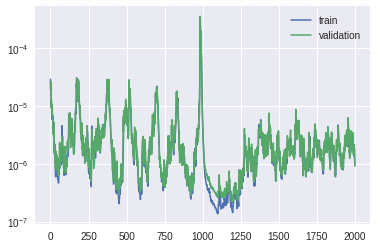

In [82]:
plt.semilogy(history.history["loss"], label="train")
plt.semilogy(history.history["val_loss"], label="validation")

plt.legend()
plt.show()